** Set Up Environment**

In [ ]:
!pip install torch torchvision
!pip install ultralytics


**Download the TACO Dataset**

In [ ]:
!git clone https://github.com/pedropro/TACO.git
%cd TACO



Cloning into 'TACO'...
remote: Enumerating objects: 740, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 740 (delta 117), reused 128 (delta 88), pack-reused 580
Receiving objects: 100% (740/740), 98.70 MiB | 26.52 MiB/s, done.
Resolving deltas: 100% (494/494), done.
/content/TACO


In [ ]:
!python download.py

Note. If for any reason the connection is broken. Just call me again and I will start where I left.
Traceback (most recent call last):
  File "/content/TACO/download.py", line 47, in <module>
    img.save(file_path, exif=img.info["exif"])
  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 2394, in save
    self._ensure_mutable()
  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 611, in _ensure_mutable
    self._copy()
  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 604, in _copy
    self.load()
  File "/usr/local/lib/python3.10/dist-packages/PIL/ImageFile.py", line 269, in load
    n, err_code = decoder.decode(b)
KeyboardInterrupt
^C


In [ ]:
import os
import json
from PIL import Image
import requests
from io import BytesIO

# Directly set the path to your dataset annotations
dataset_path = './data/annotations.json'

# Assume your dataset directory is structured as follows:
# TACO
# |__ data
#     |__ annotations.json
#     |__ (dataset images)
dataset_dir = os.path.dirname(dataset_path)

print('Note: If for any reason the connection is broken, just call me again and I will start where I left.')

# Load annotations
with open(dataset_path, 'r') as f:
    annotations = json.load(f)

    nr_images = len(annotations['images'])
    for i, image in enumerate(annotations['images']):
        file_name = image['file_name']
        url_original = image['flickr_url']

        file_path = os.path.join(dataset_dir, file_name)

        # Create subdir if necessary
        subdir = os.path.dirname(file_path)
        if not os.path.isdir(subdir):
            os.makedirs(subdir, exist_ok=True)

        if not os.path.isfile(file_path):
            # Load and Save Image
            response = requests.get(url_original)
            img = Image.open(BytesIO(response.content))
            img.save(file_path)

        # Show loading progress
        print(f"Downloaded {i+1}/{nr_images} images", end='\r')

print('Finished downloading images.')


Note: If for any reason the connection is broken, just call me again and I will start where I left.
Finished downloading images.


In [ ]:
import json
import os

# Load TACO annotations
with open('/content/TACO/data/annotations.json') as f:
    data = json.load(f)

# Create a list of category names ordered by category ID
# This assumes category IDs are sequential and start from 1
# Adjust accordingly if your category IDs do not start from 1 or have gaps
category_names = [cat['name'] for cat in sorted(data['categories'], key=lambda x: x['id'])]

# Directory to save YOLO-format labels
labels_base_dir = '/content/TACO/labels'
os.makedirs(labels_base_dir, exist_ok=True)

for img in data['images']:
    img_id = img['id']
    img_subdir = os.path.dirname(img['file_name'])  # Get subdirectory name (batch_x)
    labels_subdir = os.path.join(labels_base_dir, img_subdir)
    os.makedirs(labels_subdir, exist_ok=True)  # Ensure the subdirectory exists
    file_name = os.path.splitext(os.path.basename(img['file_name']))[0] + '.txt'  # Change extension to .txt, ensure we only get the base name
    label_path = os.path.join(labels_subdir, file_name)

    with open(label_path, 'w') as label_file:
        annotations = [ann for ann in data['annotations'] if ann['image_id'] == img_id]

        for ann in annotations:
            # Assuming bbox format is [x_min, y_min, width, height]
            bbox = ann['bbox']
            x_center = (bbox[0] + bbox[2] / 2) / img['width']
            y_center = (bbox[1] + bbox[3] / 2) / img['height']
            width = bbox[2] / img['width']
            height = bbox[3] / img['height']

            # Find the index of the category name in the category_names list
            # Note: This assumes your category IDs start at 1 and are sequential
            class_id = category_names.index(data['categories'][ann['category_id'] - 1]['name'])

            label_file.write(f"{class_id} {x_center} {y_center} {width} {height}\n")


In [ ]:
!ls /content/TACO/


data  demo.ipynb  detector  download.py  labels  LICENSE  README.md  requirements.txt


**Configure YOLO for Training**

In [ ]:
import os

# Base directory of TACO dataset
base_dir = '/content/TACO/'

# Directories to check
directories_to_check = ['data', 'labels']

# Print out the contents of the directories
for directory in directories_to_check:
    dir_path = os.path.join(base_dir, directory)
    print(f"Contents of '{directory}' directory:")
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            print(os.path.join(root, file))
    print("-" * 50)


Contents of 'data' directory:
/content/TACO/data/annotations_unofficial.json
/content/TACO/data/annotations.json
/content/TACO/data/all_image_urls.csv
/content/TACO/data/batch_7/000075.JPG
/content/TACO/data/batch_7/000106.JPG
/content/TACO/data/batch_7/000067.JPG
/content/TACO/data/batch_7/000003.JPG
/content/TACO/data/batch_7/000090.JPG
/content/TACO/data/batch_7/000081.JPG
/content/TACO/data/batch_7/000063.JPG
/content/TACO/data/batch_7/000098.JPG
/content/TACO/data/batch_7/000082.JPG
/content/TACO/data/batch_7/000002.JPG
/content/TACO/data/batch_7/000121.JPG
/content/TACO/data/batch_7/000014.JPG
/content/TACO/data/batch_7/000057.JPG
/content/TACO/data/batch_7/000043.JPG
/content/TACO/data/batch_7/000125.JPG
/content/TACO/data/batch_7/000103.JPG
/content/TACO/data/batch_7/000053.JPG
/content/TACO/data/batch_7/000128.JPG
/content/TACO/data/batch_7/000138.JPG
/content/TACO/data/batch_7/000079.JPG
/content/TACO/data/batch_7/000085.JPG
/content/TACO/data/batch_7/000080.JPG
/content/TACO

In [ ]:
import os

def list_folders(root_dir):
    for root, dirs, files in os.walk(root_dir):
        for name in dirs:
            print(os.path.join(root, name))

# Use this to list all folders and subfolders in the TACO dataset directory
list_folders('/content/TACO')


/content/TACO/detector
/content/TACO/data
/content/TACO/.git
/content/TACO/labels
/content/TACO/detector/taco_config
/content/TACO/data/batch_7
/content/TACO/data/batch_2
/content/TACO/data/batch_14
/content/TACO/data/batch_3
/content/TACO/data/batch_6
/content/TACO/data/batch_12
/content/TACO/data/batch_15
/content/TACO/data/batch_4
/content/TACO/data/batch_5
/content/TACO/data/batch_9
/content/TACO/data/batch_13
/content/TACO/data/batch_1
/content/TACO/data/batch_8
/content/TACO/data/batch_10
/content/TACO/data/batch_11
/content/TACO/.git/branches
/content/TACO/.git/logs
/content/TACO/.git/hooks
/content/TACO/.git/info
/content/TACO/.git/refs
/content/TACO/.git/objects
/content/TACO/.git/logs/refs
/content/TACO/.git/logs/refs/heads
/content/TACO/.git/logs/refs/remotes
/content/TACO/.git/logs/refs/remotes/origin
/content/TACO/.git/refs/heads
/content/TACO/.git/refs/tags
/content/TACO/.git/refs/remotes
/content/TACO/.git/refs/remotes/origin
/content/TACO/.git/objects/pack
/content/TACO

In [ ]:
import os

def check_data_split(base_dir):
    # Define common folder names for splits
    split_names = ['train', 'val', 'test']
    found_splits = {split_name: False for split_name in split_names}

    # Check each subdirectory in the base directory
    for root, dirs, files in os.walk(base_dir):
        for name in dirs:
            if name in split_names:
                found_splits[name] = True
                print(f"Found '{name}' directory: {os.path.join(root, name)}")

    # Check if any known split names were found
    if any(found_splits.values()):
        print("Dataset appears to be split into separate sets.")
    else:
        print("No explicit data split found. Consider manually splitting the dataset.")

# Example usage:
check_data_split('/content/TACO/data')
check_data_split('/content/TACO/labels')


No explicit data split found. Consider manually splitting the dataset.
No explicit data split found. Consider manually splitting the dataset.


In [ ]:
import os
import random
from glob import glob

# Seed for reproducibility
random.seed(42)

# Base path to the dataset
base_path = '/content/TACO/data'

# Gather all image paths
image_paths = glob(os.path.join(base_path, 'batch_*', '*.jpg'))

# Shuffle the image paths
random.shuffle(image_paths)

# Split ratio for training and validation
split_ratio = 0.8

# Calculate the split index
split_index = int(len(image_paths) * split_ratio)

# Split the paths into training and validation sets
train_images = image_paths[:split_index]
val_images = image_paths[split_index:]

print(f'Training images: {len(train_images)}, Validation images: {len(val_images)}')

# Example of how you would update the YAML file with actual paths (pseudo-code)
# yaml_content = {
#     'train': '/path/to/train/images',  # This would be replaced with the actual list or directory
#     'val': '/path/to/validation/images',  # Same here
#     'nc': 60,
#     'names': [f'class{i+1}' for i in range(60)]
# }


Training images: 666, Validation images: 167


In [ ]:
import os
import random
import shutil
from glob import glob

# Seed for reproducibility
random.seed(42)

# Base path to the dataset images and where to store the structured dataset
base_image_path = '/content/TACO/data'
structured_base_path = '/content/TACO'

# Make sure the structured base path directories exist
train_images_path = os.path.join(structured_base_path, 'train/images')
train_labels_path = os.path.join(structured_base_path, 'train/labels')
val_images_path = os.path.join(structured_base_path, 'val/images')
val_labels_path = os.path.join(structured_base_path, 'val/labels')

for path in [train_images_path, train_labels_path, val_images_path, val_labels_path]:
    os.makedirs(path, exist_ok=True)

# Gather all image paths
image_paths = glob(os.path.join(base_image_path, 'batch_*', '*.jpg'))

# Shuffle the image paths
random.shuffle(image_paths)

# Split ratio for training and validation
split_ratio = 0.8

# Calculate the split index
split_index = int(len(image_paths) * split_ratio)

# Split the paths into training and validation sets
train_images = image_paths[:split_index]
val_images = image_paths[split_index:]

# Function to copy images and their labels
def copy_files(file_paths, dest_image_path, dest_label_path):
    for file_path in file_paths:
        # Copy image
        shutil.copy(file_path, dest_image_path)

        # Assuming label file has the same name but with .txt extension
        label_file_path = file_path.replace('.jpg', '.txt').replace('/data/', '/labels/')
        if os.path.exists(label_file_path):
            shutil.copy(label_file_path, dest_label_path)

# Copy training images and labels
copy_files(train_images, train_images_path, train_labels_path)

# Copy validation images and labels
copy_files(val_images, val_images_path, val_labels_path)

print(f'Copied {len(train_images)} training images and labels')
print(f'Copied {len(val_images)} validation images and labels')


Copied 666 training images and labels
Copied 167 validation images and labels


Configure YOLO for Training

Create a .yaml file for the dataset.

In [ ]:
# Generate class names list
class_names = [f'class{i+1}' for i in range(60)]

# Convert the list to a YAML-compatible format (a string of the list representation)
class_names_str = str(class_names)

yaml_content = f"""
train: /content/TACO/train
val: /content/TACO/val

nc: 60
names: {class_names_str}
"""

# Now, write the yaml_content to a file
with open('taco.yaml', 'w') as f:
    f.write(yaml_content.strip())


In [ ]:
import os

# Check current directory
print("Current directory:", os.getcwd())

# If you are not in the yolov5 directory, change to it
if 'yolov5' not in os.getcwd():
    try:
        os.chdir('yolov5')  # Change to the YOLOv5 directory
        print("Changed directory to yolov5:", os.getcwd())
    except FileNotFoundError:
        print("Directory 'yolov5' not found. Make sure you've cloned the YOLOv5 repository and the path is correct.")


Current directory: /content
Directory 'yolov5' not found. Make sure you've cloned the YOLOv5 repository and the path is correct.


In [ ]:
# Change directory to where YOLOv5 is located
%cd /content/TACO/yolov5

# Now you can check your current directory to confirm
!pwd


/content/TACO/yolov5
/content/TACO/yolov5


In [ ]:
# Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5

# Change directory to the YOLOv5 folder
%cd yolov5

# Install YOLOv5 requirements
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 16530, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 16530 (delta 1), reused 5 (delta 0), pack-reused 16522
Receiving objects: 100% (16530/16530), 15.05 MiB | 24.35 MiB/s, done.
Resolving deltas: 100% (11354/11354), done.
/content/TACO/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.

In [34]:
!python train.py --img 640 --batch 16 --epochs 10 --data taco.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --name taco_model


Traceback (most recent call last):
  File "/content/TACO/yolov5/train.py", line 34, in <module>
    import torch
  File "/usr/local/lib/python3.10/dist-packages/torch/__init__.py", line 1854, in <module>
    from . import _meta_registrations
  File "/usr/local/lib/python3.10/dist-packages/torch/_meta_registrations.py", line 9, in <module>
    from torch._decomp import (
  File "/usr/local/lib/python3.10/dist-packages/torch/_decomp/__init__.py", line 243, in <module>
    import torch._decomp.decompositions
  File "/usr/local/lib/python3.10/dist-packages/torch/_decomp/decompositions.py", line 111, in <module>
    def sigmoid_backward(out_grad: Tensor, y: Tensor):
  File "/usr/local/lib/python3.10/dist-packages/torch/_decomp/__init__.py", line 185, in decomposition_decorator
    pytree.tree_map_(register, aten_op)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_pytree.py", line 607, in tree_map_
    deque(map(func, flat_args), maxlen=0)  # consume and exhaust the iterable
  F

In [29]:
pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


In [ ]:
import os
print(os.path.exists('/content/TACO/yolov5/runs/train/taco_model/weights/best.pt'))


False


In [3]:
!ls /content/TACO/yolov5/runs/train/


taco_model   taco_model3  taco_model5  taco_model7
taco_model2  taco_model4  taco_model6  taco_model8


In [32]:
!python val.py --weights /content/TACO/yolov5/runs/train/taco_model5/weights/best.pt --data taco.yaml --img 640 --iou-thres 0.5


val: data=taco.yaml, weights=['/content/TACO/yolov5/runs/train/taco_model5/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.5, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7171945 parameters, 0 gradients, 16.3 GFLOPs
val: Scanning /content/TACO/val.cache... 83 images, 83 backgrounds, 0 corrupt: 100% 166/166 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 6/6 [02:37<00:00, 26.20s/it

Testing the Model

In [4]:
# Adjust the path to point to the 'best.pt' file in the correct 'taco_model' directory
model_weights_path = '/content/TACO/yolov5/runs/train/taco_model8/weights/best.pt'

# Load the trained model using the correct path
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_weights_path)


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-4-12 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7171945 parameters, 0 gradients, 16.3 GFLOPs
Adding AutoShape... 


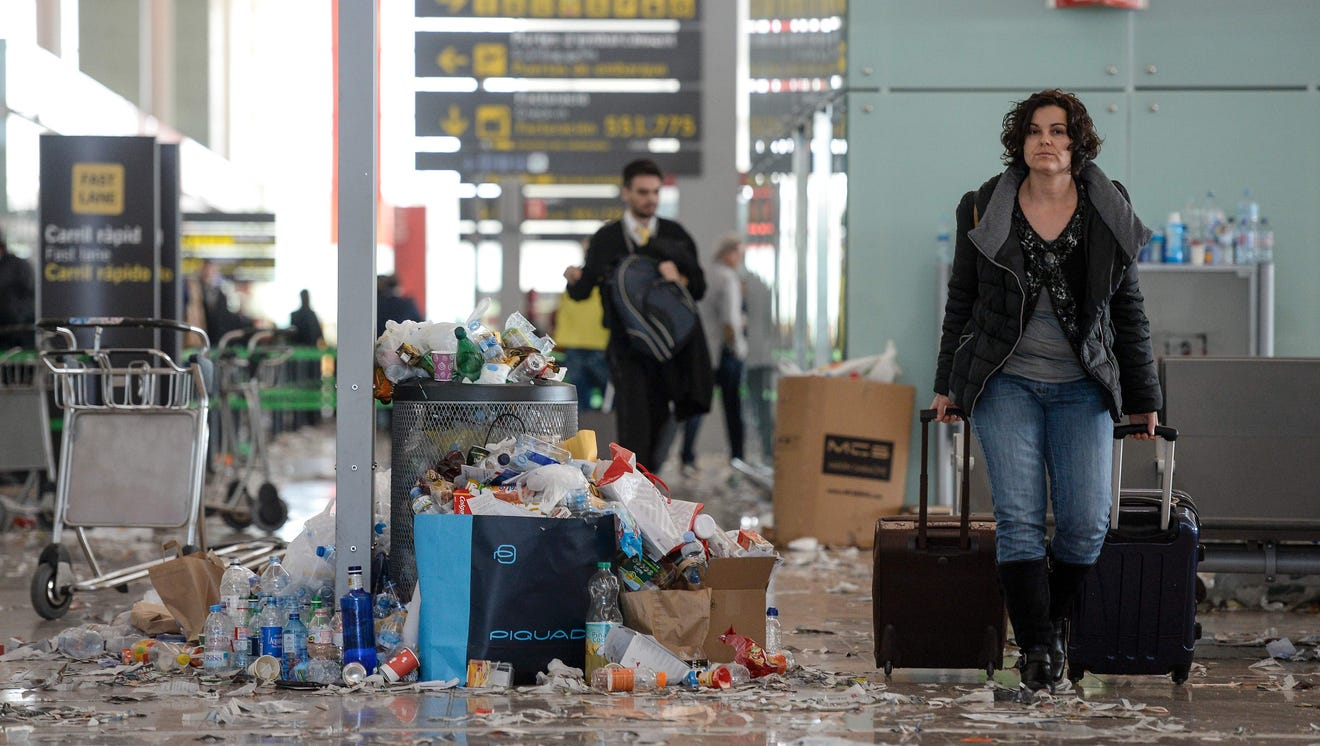

In [8]:
import torch
import requests
from PIL import Image
from io import BytesIO

# Adjust the model's confidence threshold
model.conf = 0.25  # Set the confidence threshold
# List of online image URLs
image_urls = ['https://www.usatoday.com/gcdn/-mm-/e15bdd859322f82cb513aa34474eb50e5b5d2c27/c=0-485-4731-3158/local/-/media/2016/12/07/USATODAY/USATODAY/636167095480336723-AFP-AFP-IP11R.jpg?width=1320&height=746&fit=crop&format=pjpg&auto=webp']

# Download and open the image
response = requests.get(image_urls[0])
image = Image.open(BytesIO(response.content)).convert("RGB")



# Display the original image with bounding boxes
results.show()


# Optionally, save the image with detections to a file
# results.save('/path/to/save/image')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')